In [85]:
import bs4
import pandas as pd
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
import requests
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor




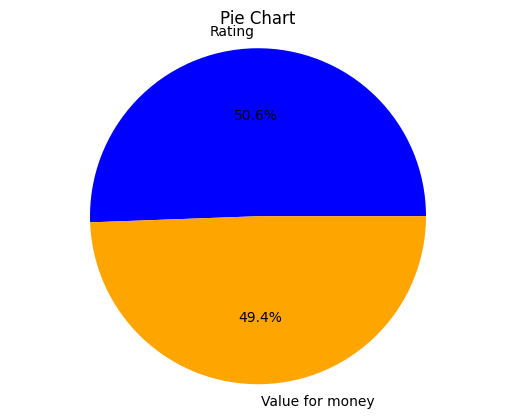

In [98]:
csv_path="hotels_data.csv"
df = pd.read_csv(csv_path)

df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)


# Extract the columns 
val_data = df['Value for money']
loc_data = df['Rating']

# Pie Chart Creating
plt.pie([sum(rating_data), sum(val_data)], labels=[rating, val], autopct='%1.1f%%')
plt.title('Pie Chart')
plt.axis('equal')
plt.show()




2157.0


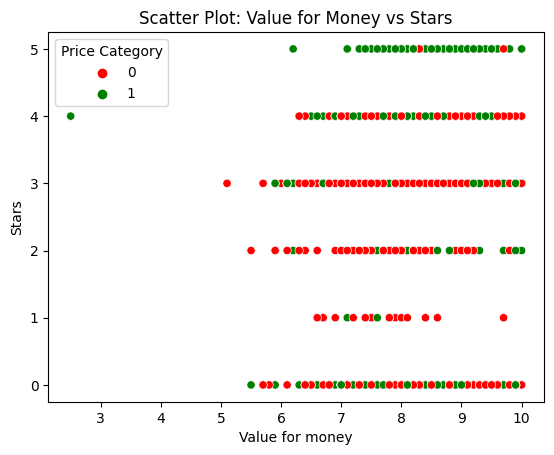

In [87]:

# Assign the column names to variables
rating = 'Rating'
val = 'Value for money'
price_median = df['Price'].median()
print(price_median)

# Create a new column "Price Category" based on median comparison
df['Price Category'] = df['Price'].apply(lambda x: 1 if x > price_median else 0)





# Specify the column names
x = 'Value for money'
y = 'Stars'
color_col = 'Price Category'

# Create a color map for the categories
color_map = {0: 'red', 1: 'green'}

# Create the scatter plot with different colors
sns.scatterplot(data=df, x=x, y=y, hue=color_col, palette=color_map)

# Set labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title('Scatter Plot: Value for Money vs Stars')

# Show the plot
plt.show()


2157.0


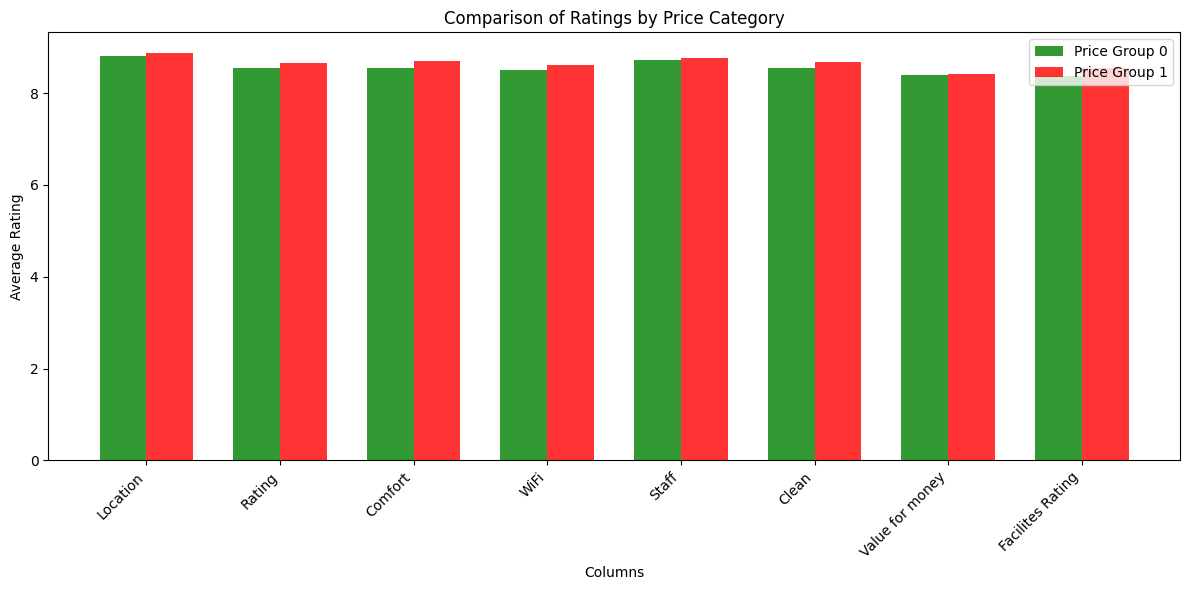

In [88]:
price_median = df['Price'].median()
print(price_median)

# Create a new column "Price Category" based on median comparison
df['Price Category'] = df['Price'].apply(lambda x: 1 if x > price_median else 0)

# Group the data by the 'Price Category' column
grouped_data = df.groupby('Price Category')

# Define the columns to compare
columns_to_compare = ['Location', 'Rating', 'Comfort', 'WiFi', 'Staff', 'Clean','Value for money','Facilites Rating']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set the bar width
bar_width = 0.35

# Set the opacity of the bars
opacity = 0.8

# Set the positions for the bars
positions = np.arange(len(columns_to_compare))

# Iterate over each column and plot the grouped bars
for i, column in enumerate(columns_to_compare):
    values_group_0 = grouped_data.get_group(0)[column].mean()
    values_group_1 = grouped_data.get_group(1)[column].mean()

    rects_group_0 = ax.bar(positions[i] - bar_width/2, values_group_0, bar_width, alpha=opacity, color='green', label='Price Group 0' if i == 0 else None)
    rects_group_1 = ax.bar(positions[i] + bar_width/2, values_group_1, bar_width, alpha=opacity, color='red', label='Price Group 1' if i == 0 else None)

# Set the axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Average Rating')
ax.set_title('Comparison of Ratings by Price Category')

# Set the x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
ax.legend(handles[:2], unique_labels[:2])

# Show the plot
plt.tight_layout()
plt.show()

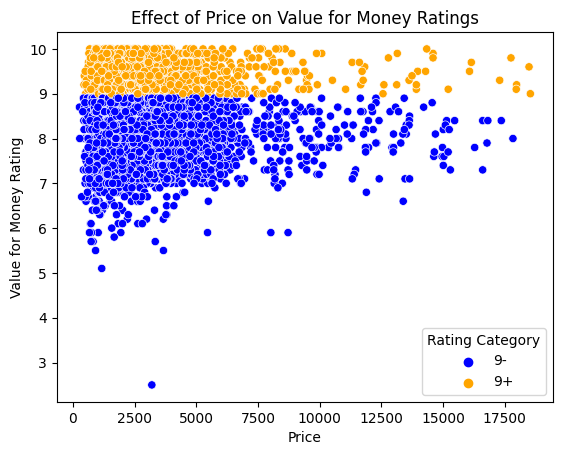

In [89]:
# Filter the data to include prices up to 20000
filtered_df = df[df['Price'] <= 20000]

# Create a new column 'Rating Category' based on 'Value for money' rating
filtered_df['Rating Category'] = filtered_df['Value for money'].apply(lambda x: '9+' if x >= 9 else '9-')

# Set the color palette for the scatter plot
colors = {'9+': 'blue', '9-': 'orange'}
sns.set_palette(colors.values())

# Create a scatter plot
sns.scatterplot(data=filtered_df, x='Price', y='Value for money', hue='Rating Category')

# Set the title and labels
plt.title('Effect of Price on Value for Money Ratings')
plt.xlabel('Price')
plt.ylabel('Value for Money Rating')

# Show the plot
plt.show()

In [96]:
df.drop('Value for money', axis=1)
df.info()

# Split the data into features (X) and target variable (y)
X = df.drop('Value for money', axis=1)
y = df['Value for money']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Split the data into features (X) and target variable (y)
X = df.drop('Value for money', axis=1)
y = df['Value for money']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5744 non-null   float64
 1   Location           5744 non-null   float64
 2   Stars              5744 non-null   float64
 3   Staff              5744 non-null   float64
 4   Comfort            5744 non-null   float64
 5   Value for money    5744 non-null   float64
 6   WiFi               5744 non-null   float64
 7   Clean              5744 non-null   float64
 8   Reviews            5744 non-null   float64
 9   Rating             5744 non-null   float64
 10  Facilities Amount  5744 non-null   float64
 11  Price              5744 non-null   float64
 12  Facilites Rating   5744 non-null   float64
dtypes: float64(13)
memory usage: 583.5 KB
Mean Squared Error (MSE): 0.4702523933855526
Root Mean Squared Error (RMSE): 0.6857495121292851
Mean Absolute Error (MAE): 0.45761

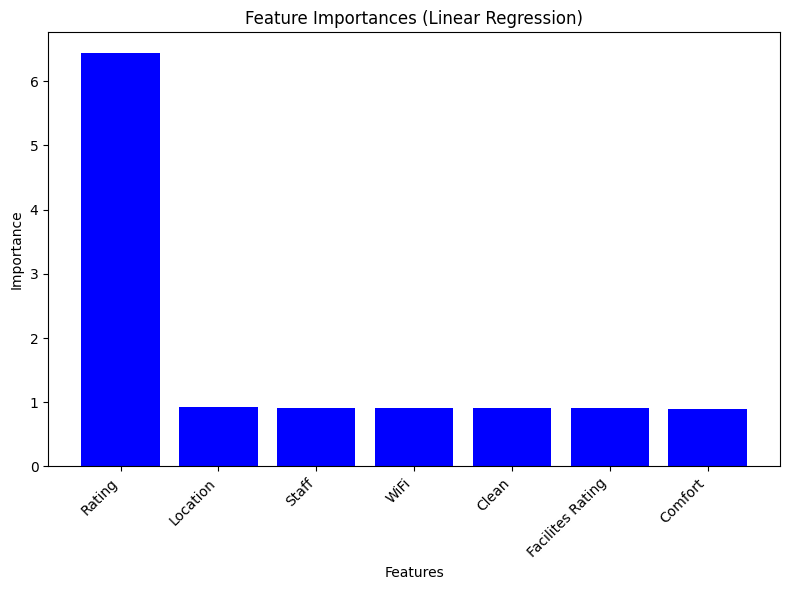

In [101]:


temporary_columns = ['Stars','Facilities Amount','Reviews','Price']
df = df.drop(temporary_columns, axis=1)


X = df.drop('Value for money', axis=1)  # Assuming 'Value for money' is the name of the target column
y = df['Value for money']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature importances from the trained model
importances = np.abs(model.coef_)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Linear Regression)')
plt.tight_layout()
plt.show()